In [1]:
#Importing all required libraries for performing analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading data
data = pd.read_csv("bike_dataset.csv", encoding_errors = 'ignore')

In [3]:
print("The shape of raw data is: ",data.shape)

The shape of raw data is:  (361, 9)


In [4]:
data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [5]:
data.tail()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
356,Aprilia RSV4,2369000,1099.0,12.0,Petrol Bike,202,https://www.carandbike.com/aprilia-bikes/rsv4,NaN,NaN
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,Petrol Bike,228,https://www.carandbike.com/harley-davidson-bik...,NaN,NaN
358,Suzuki Hayabusa,1640000,1340.0,11.0,Petrol Bike,266,https://www.carandbike.com/suzuki-bikes/hayabusa,NaN,NaN
359,Ducati Hypermotard 950,1402278,937.0,9.0,Petrol Bike,176,https://www.carandbike.com/ducati-bikes/hyperm...,NaN,NaN
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,https://www.carandbike.com/harley-davidson-bik...,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [7]:
# Creating duplicate data
data_2 = data.copy()

In [8]:
data_2.drop_duplicates()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0
...,...,...,...,...,...,...,...,...,...
356,Aprilia RSV4,2369000,1099.0,12.0,Petrol Bike,202,https://www.carandbike.com/aprilia-bikes/rsv4,NaN,NaN
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,Petrol Bike,228,https://www.carandbike.com/harley-davidson-bik...,NaN,NaN
358,Suzuki Hayabusa,1640000,1340.0,11.0,Petrol Bike,266,https://www.carandbike.com/suzuki-bikes/hayabusa,NaN,NaN
359,Ducati Hypermotard 950,1402278,937.0,9.0,Petrol Bike,176,https://www.carandbike.com/ducati-bikes/hyperm...,NaN,NaN


In [9]:
data_2.shape

(361, 9)

**Observation:**

- We don't have any duplicate data in dataset.

In [10]:
data_2.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


In [11]:
# Droping links column because we dont need it for data analysis purpose.
data_2.drop(['links'], axis=1, inplace = True)

In [12]:
data_2.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
acceleration_speed    191
top_speed             161
dtype: int64

In [13]:
data_2["CC"].value_counts()

249.0     11
998.0     10
1811.0     8
1745.0     8
937.0      7
          ..
799.0      1
1084.0     1
300.0      1
649.3      1
1923.0     1
Name: CC, Length: 129, dtype: int64

In [14]:
# As there is no Engine displacement for Electric bikes.
data_2["CC"] = data["CC"].fillna(0)

In [15]:
data_2.isnull().sum()

model_name              0
price                   0
CC                      0
mileage                 0
type_of_bike            0
weight_in_kg            0
acceleration_speed    191
top_speed             161
dtype: int64

In [16]:
data_2.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,0.0,320.0,Electric Bike,100,4.2,70.0
1,Simple Energy One,109999,0.0,236.0,Electric Bike,110,3.6,100.0
2,Okaya Classiq,69900,0.0,200.0,Electric Bike,95,NaN,25.0
3,Oben Electric Rorr,102999,0.0,200.0,Electric Bike,120,3.0,100.0
4,Ola Electric S1,85099,0.0,181.0,Electric Bike,121,2.9,116.0


In [17]:
data_2["acceleration_speed"] = data["acceleration_speed"].fillna(np.mean(data["acceleration_speed"]))

In [18]:
data_2["top_speed"] = data["top_speed"].fillna(np.mean(data["top_speed"]))

In [19]:
data_2.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
acceleration_speed    0
top_speed             0
dtype: int64

In [20]:
data_2.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,0.0,320.0,Electric Bike,100,4.200000,70.0
1,Simple Energy One,109999,0.0,236.0,Electric Bike,110,3.600000,100.0
2,Okaya Classiq,69900,0.0,200.0,Electric Bike,95,4.193412,25.0
3,Oben Electric Rorr,102999,0.0,200.0,Electric Bike,120,3.000000,100.0
4,Ola Electric S1,85099,0.0,181.0,Electric Bike,121,2.900000,116.0


In [21]:
data_2.tail()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
356,Aprilia RSV4,2369000,1099.0,12.0,Petrol Bike,202,4.193412,99.33865
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,Petrol Bike,228,4.193412,99.33865
358,Suzuki Hayabusa,1640000,1340.0,11.0,Petrol Bike,266,4.193412,99.33865
359,Ducati Hypermotard 950,1402278,937.0,9.0,Petrol Bike,176,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,4.193412,99.33865


In [22]:
data_2.columns

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'acceleration_speed', 'top_speed'],
      dtype='object')

#### Label Encoding our "type_of_bike" column

In [25]:
data_2["type_of_bike"].value_counts()

Petrol Bike      304
Electric Bike     57
Name: type_of_bike, dtype: int64

In [26]:
data_2.head(8)

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,0.0,320.0,Electric Bike,100,4.200000,70.0
1,Simple Energy One,109999,0.0,236.0,Electric Bike,110,3.600000,100.0
2,Okaya Classiq,69900,0.0,200.0,Electric Bike,95,4.193412,25.0
3,Oben Electric Rorr,102999,0.0,200.0,Electric Bike,120,3.000000,100.0
4,Ola Electric S1,85099,0.0,181.0,Electric Bike,121,2.900000,116.0
5,Ola Electric S1 Pro,120149,0.0,181.0,Electric Bike,125,2.900000,116.0
6,Revolt RV300,114264,0.0,180.0,Electric Bike,101,4.000000,65.0
7,Okinawa Praise,71990,0.0,170.0,Electric Bike,96,9.430000,78.0


In [27]:
# Importing LabelEncoder Class
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
# Here it encoded Petrol Bikes as 1 and Electric bikes as 0.
data_2["type_of_bike"] = encoder.fit_transform(data_2["type_of_bike"]) 

In [29]:
data_2.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,0.0,320.0,0,100,4.200000,70.0
1,Simple Energy One,109999,0.0,236.0,0,110,3.600000,100.0
2,Okaya Classiq,69900,0.0,200.0,0,95,4.193412,25.0
3,Oben Electric Rorr,102999,0.0,200.0,0,120,3.000000,100.0
4,Ola Electric S1,85099,0.0,181.0,0,121,2.900000,116.0


In [31]:
data_2.tail()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
356,Aprilia RSV4,2369000,1099.0,12.0,1,202,4.193412,99.33865
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,1,228,4.193412,99.33865
358,Suzuki Hayabusa,1640000,1340.0,11.0,1,266,4.193412,99.33865
359,Ducati Hypermotard 950,1402278,937.0,9.0,1,176,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,1,411,4.193412,99.33865


#### Lets Check for count of Bike w.r.t Petrol and Electric bike.

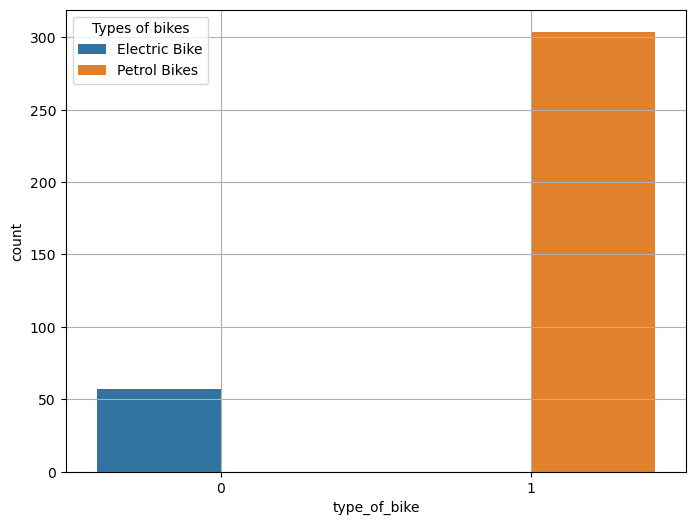

In [77]:
plt.figure(figsize=[8,6])
sns.countplot(data = data_2, x = "type_of_bike", hue="type_of_bike")
plt.legend(title='Types of bikes', loc='upper left', labels=['Electric Bike', 'Petrol Bikes'])
plt.grid()
plt.show()

**Observation**

- Majority of Bikes are Petrol bikes.

In [84]:
data_2.columns

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'acceleration_speed', 'top_speed'],
      dtype='object')

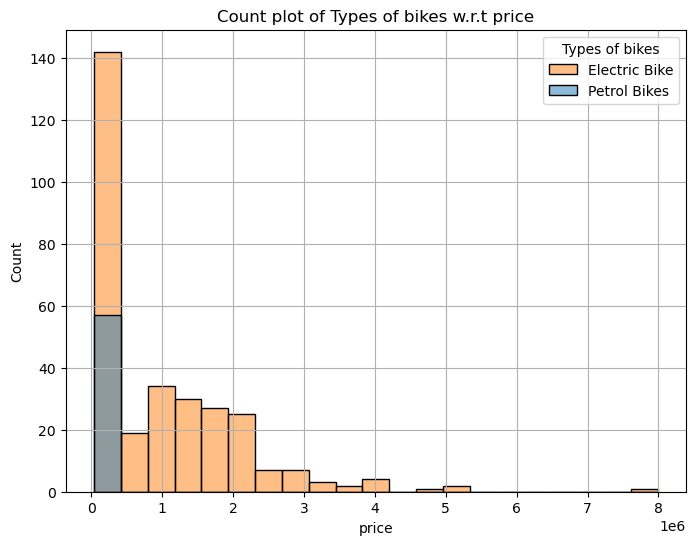

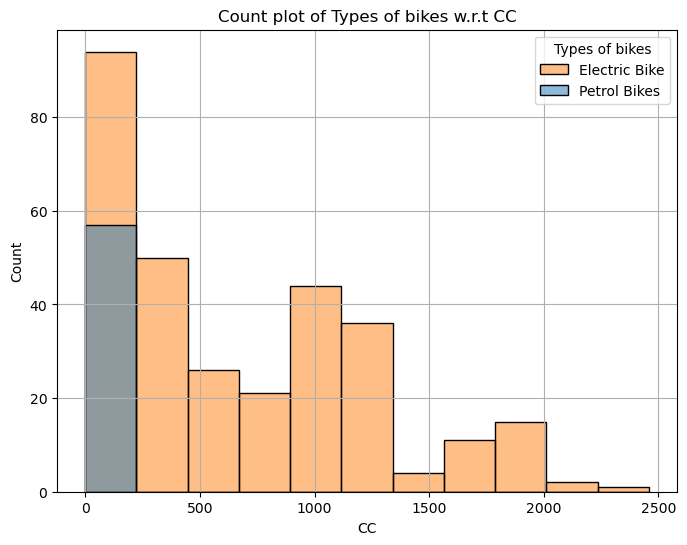

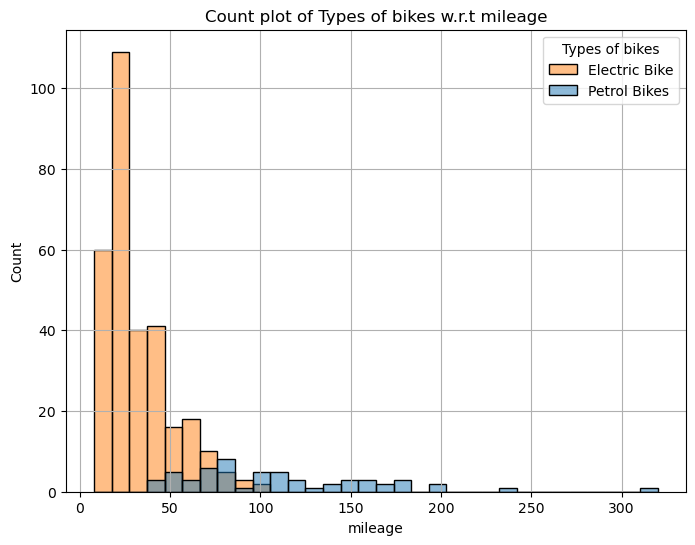

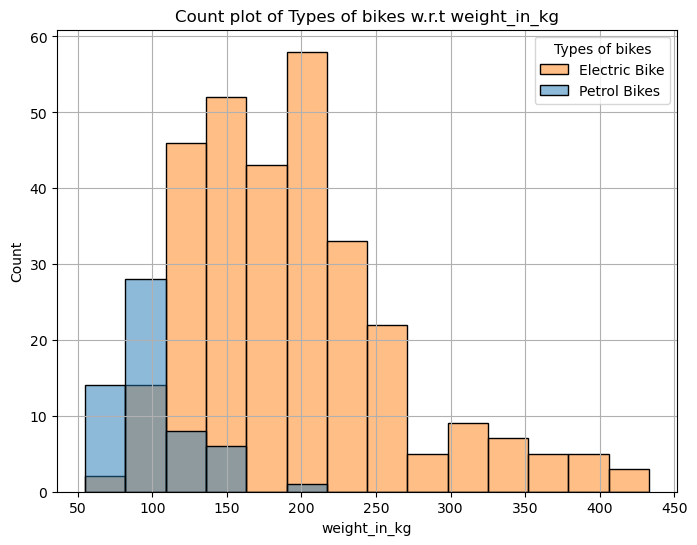

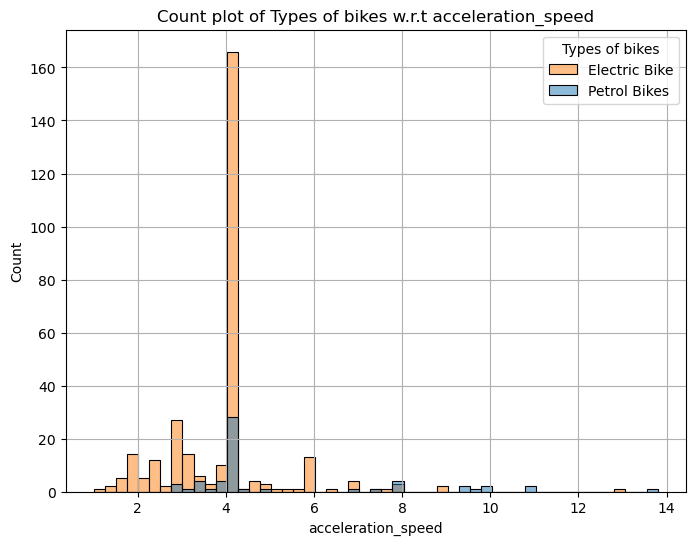

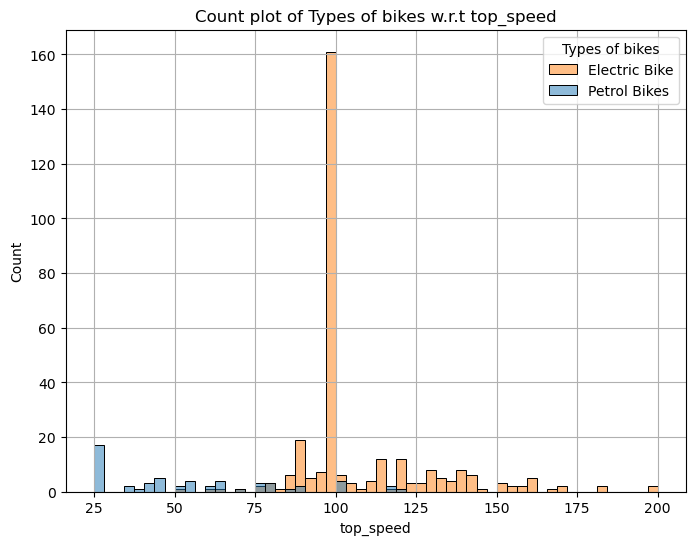

In [102]:
data_columns = data_2[['price', 'CC', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']]
for column in data_columns:
    plt.figure(figsize=[8,6])
    sns.histplot(data = data_2, x = column, hue="type_of_bike")
    plt.legend(title='Types of bikes', loc='upper right', labels=['Electric Bike', 'Petrol Bikes'])
    plt.grid()
    plt.title("Count plot of Types of bikes w.r.t {}".format(column))
    plt.show()

**Observation**

* Electric bikes are more afforable than Petrol bikes.
* Electric bikes result in giving most economy mileage in the industry.
* Electric bikes are most suitable and affordable bikes in the current automobile market.
* Petrol bikes are having most premium category of bikes in market.

In [107]:
# Lets check for Top 5 best premium category Petrol bikes w.r.t to Price. 
petrol_bikes = data_2[data_2["type_of_bike"] == 1][['model_name','price', 'mileage', 'acceleration_speed','top_speed']]
petrol_bikes.sort_values("price", ascending=False).head(5)

,model_name,price,mileage,acceleration_speed,top_speed
339,Kawasaki Ninja H2R,7990000,15.0,4.193412,99.33865
338,Ducati 1299 Panigale,5182000,15.0,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,8.0,4.193412,99.33865
337,Indian Roadmaster Elite,4800000,15.0,4.193412,99.33865
310,BMW M 1000 RR,4200000,15.4,4.193412,99.33865


In [ ]:
# Lets check for Top 5 best high end Electric bikes w.r.t to Price. 
electric_bikes = data_2[data_2["type_of_bike"] == 0][['model_name','price', 'mileage', 'acceleration_speed','top_speed']]
electric_bikes.sort_values("price", ascending=False).head(5)

,model_name,price,mileage,acceleration_speed,top_speed
14,One Moto Electa,199000,150.0,3.3,85.0
53,TVS iQube,166358,75.0,4.2,78.0
15,Odysse Evoqis,157000,140.0,4.2,80.0
20,EeVe Soul,140000,120.0,8.0,55.0
13,Kabira Mobility KM 4000,136990,150.0,3.1,120.0


In [108]:
# Top 5 best performing and affordable petrol bikes w.r.t to Mileage.
best_mileage_bikes = petrol_bikes.sort_values("mileage", ascending = False).head(5)
best_mileage_bikes

,model_name,price,mileage,acceleration_speed,top_speed
26,Bajaj CT 110,46413,104.0,3.0,90.0
32,Bajaj Platina 100,52915,96.9,3.0,90.0
34,Bajaj CT 100,40794,89.5,3.3,90.0
35,Hero HF Deluxe i3s,59800,88.5,3.6,90.0
36,TVS Star City +,65865,86.0,3.2,90.0


In [114]:
# Lets check for Top 5 best performing and affordable Electric bikes w.r.t to Mileage. 
best_electric_mileage_bikes = electric_bikes.sort_values("mileage", ascending=False).head(5)
best_electric_mileage_bikes

,model_name,price,mileage,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,320.0,4.200000,70.0
1,Simple Energy One,109999,236.0,3.600000,100.0
2,Okaya Classiq,69900,200.0,4.193412,25.0
3,Oben Electric Rorr,102999,200.0,3.000000,100.0
4,Ola Electric S1,85099,181.0,2.900000,116.0


In [118]:
data_2.skew().index
numerical_data_cols = ['price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
                     'acceleration_speed', 'top_speed']

C:\Users\Piyush S More\AppData\Local\Temp\ipykernel_22144\3183861024.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_2.skew().index


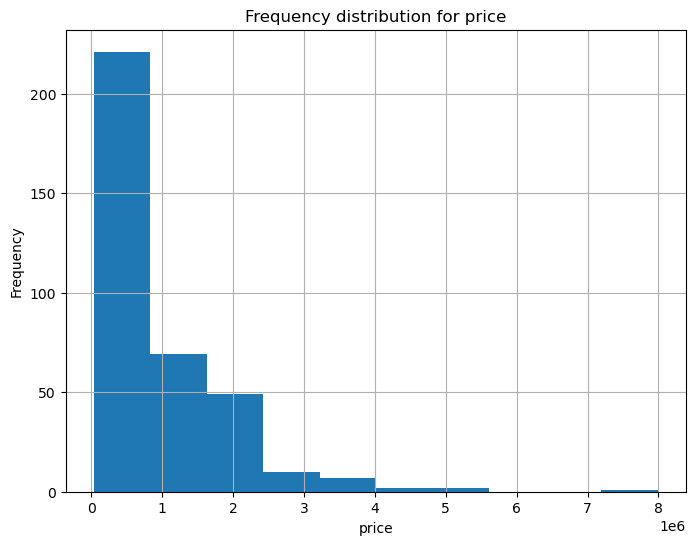

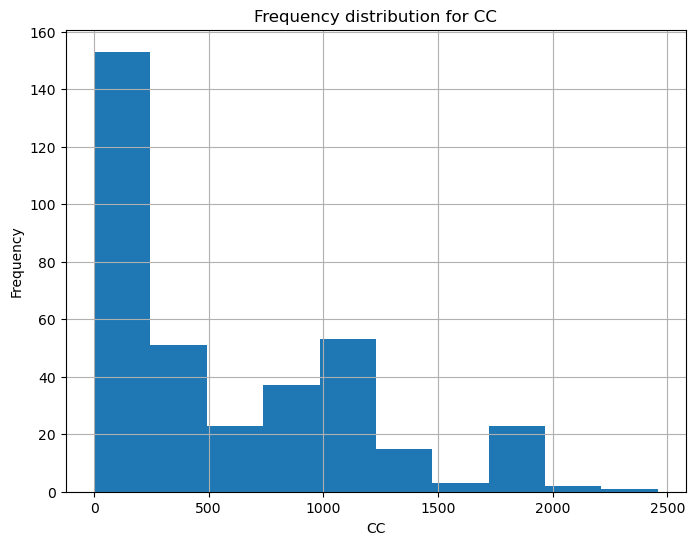

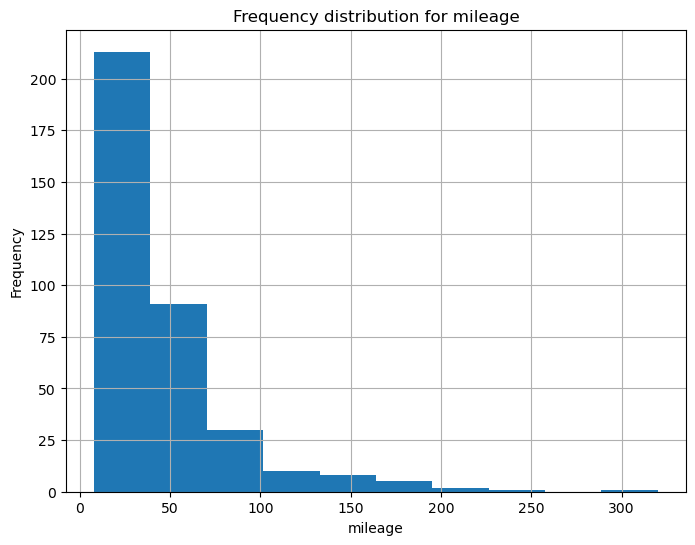

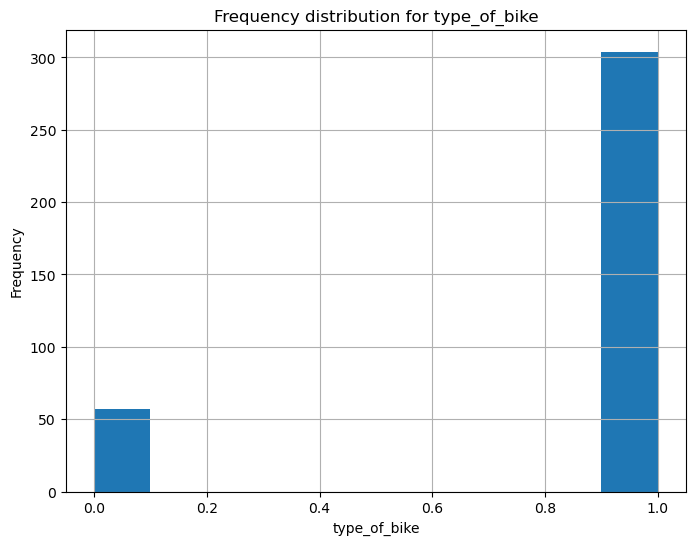

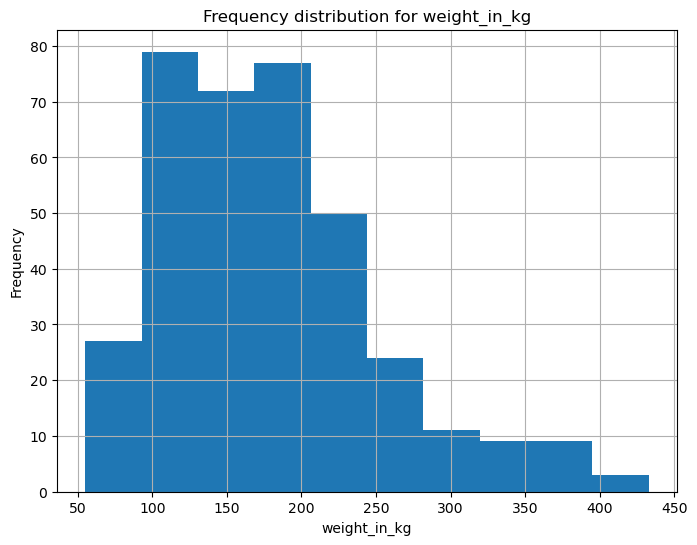

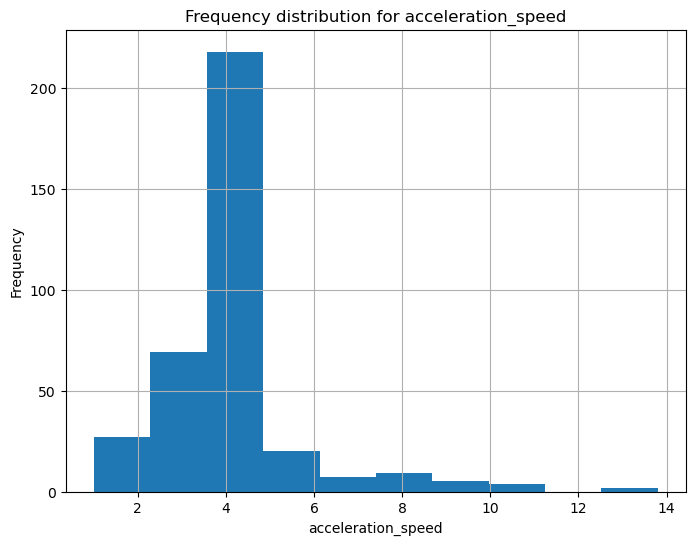

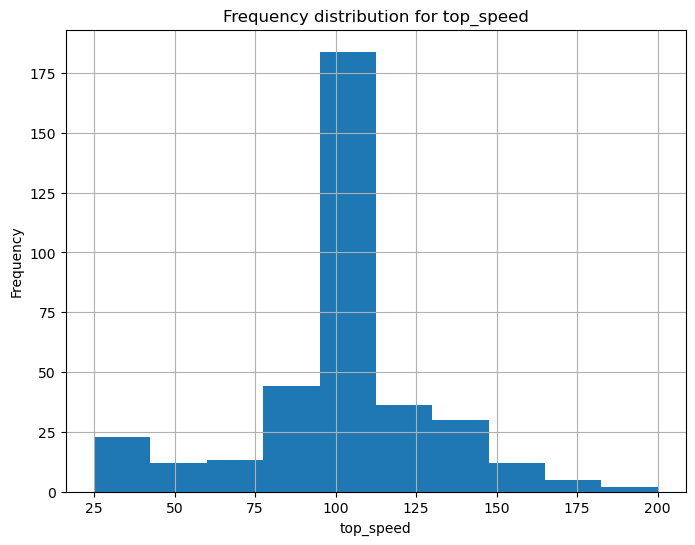

In [121]:
for column in numerical_data_cols:
    plt.figure(figsize=[8,6])
    plt.hist(data_2[column])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.title("Frequency distribution for {}".format(column))
plt.show()

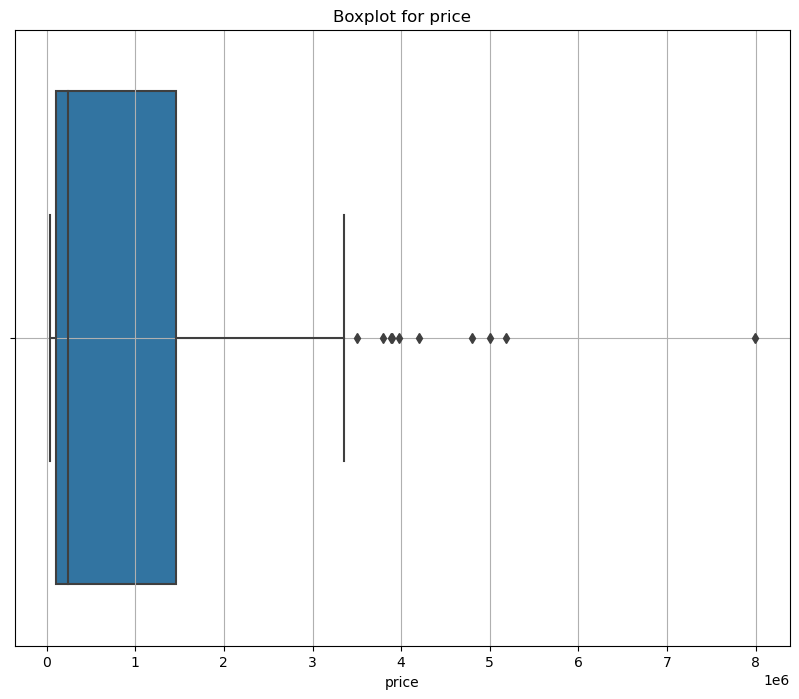

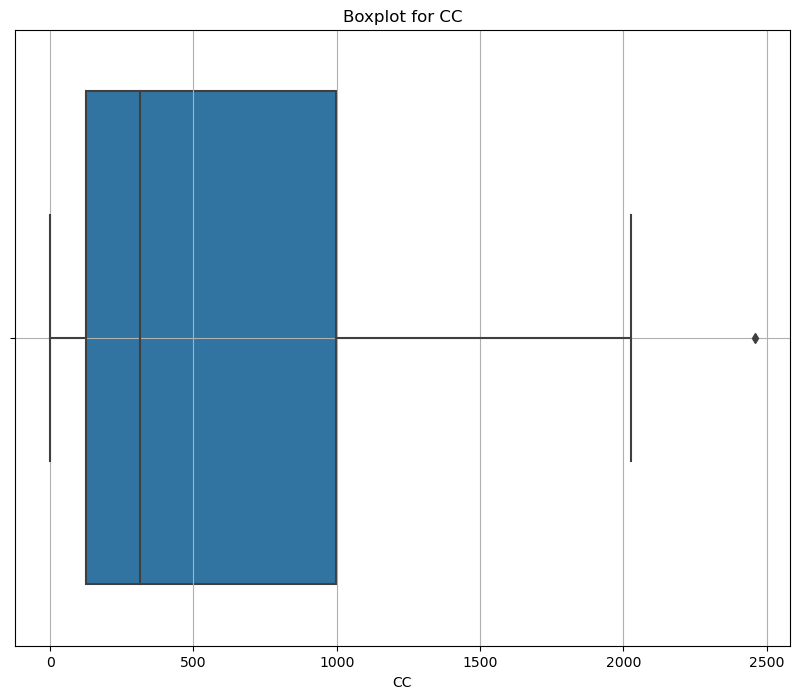

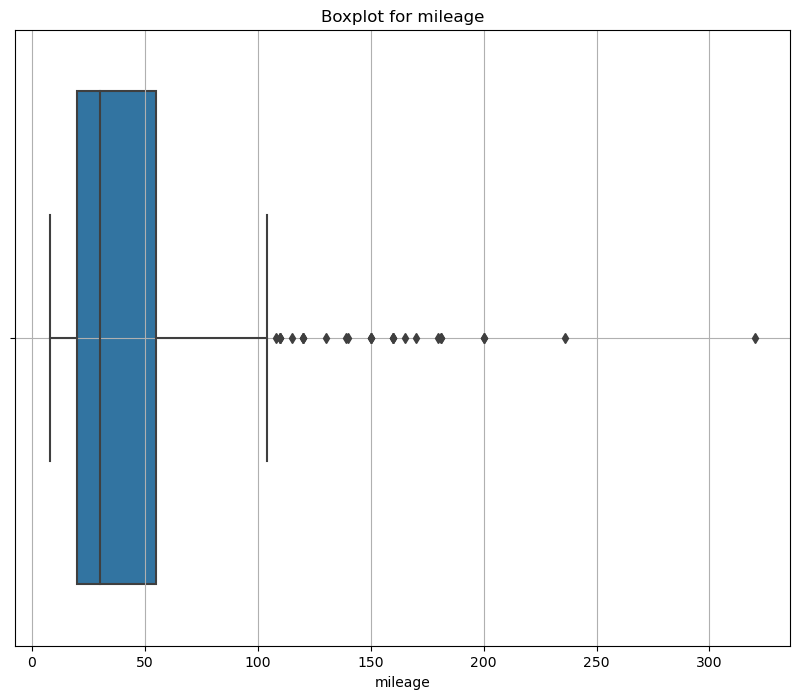

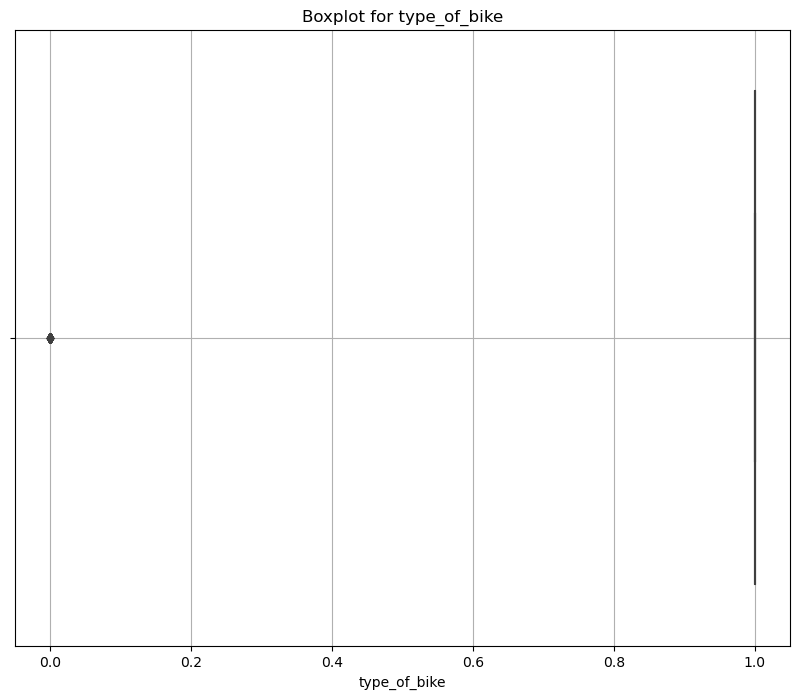

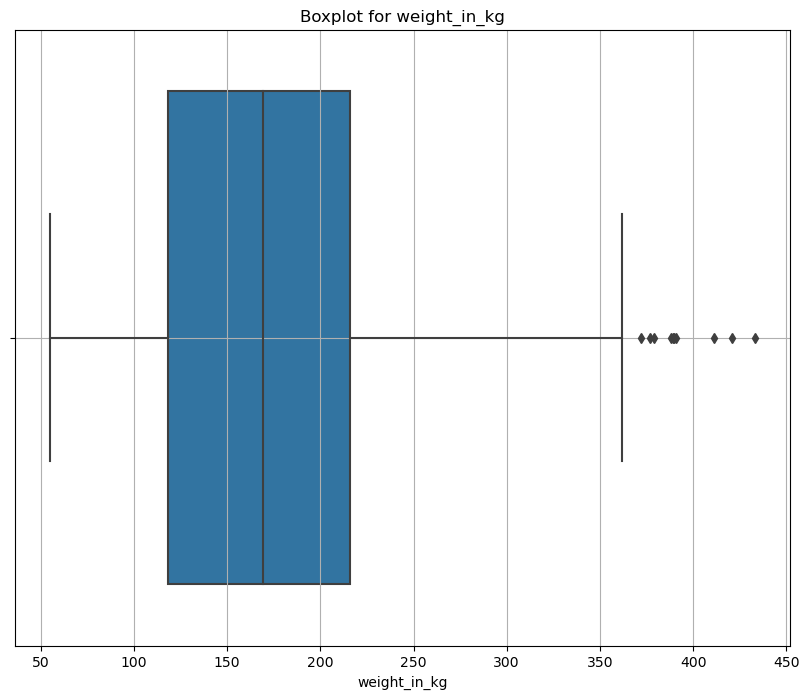

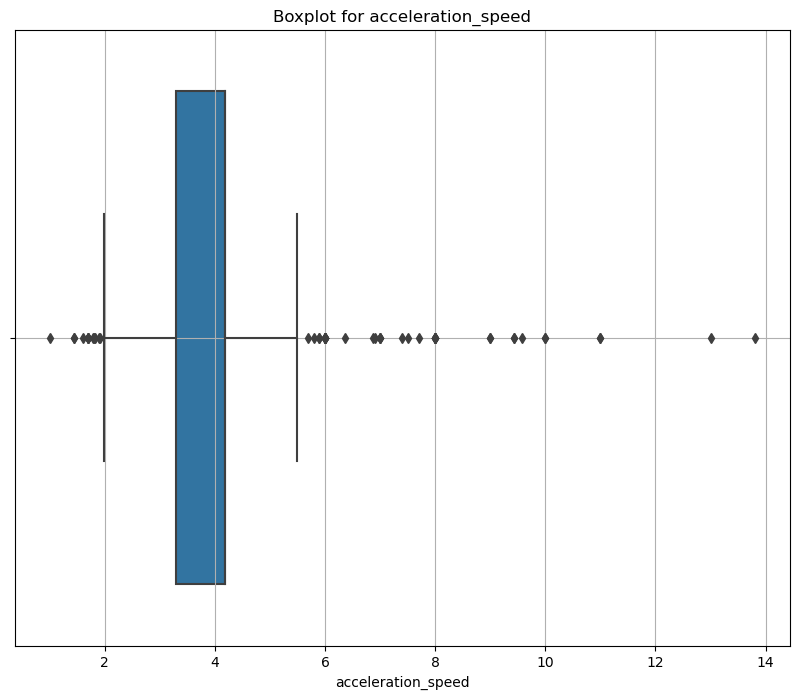

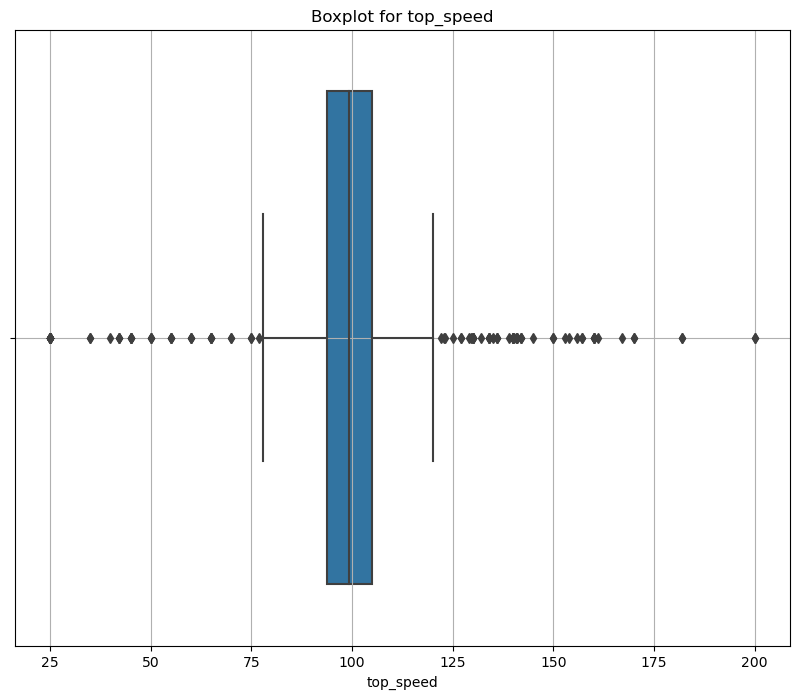

In [122]:
for column in numerical_data_cols:
    plt.figure(figsize = [10,8])
    sns.boxplot(x=column, data = data_2, orient = 'h')
    plt.grid()
    plt.title("Boxplot for {}".format(column))
    plt.show()

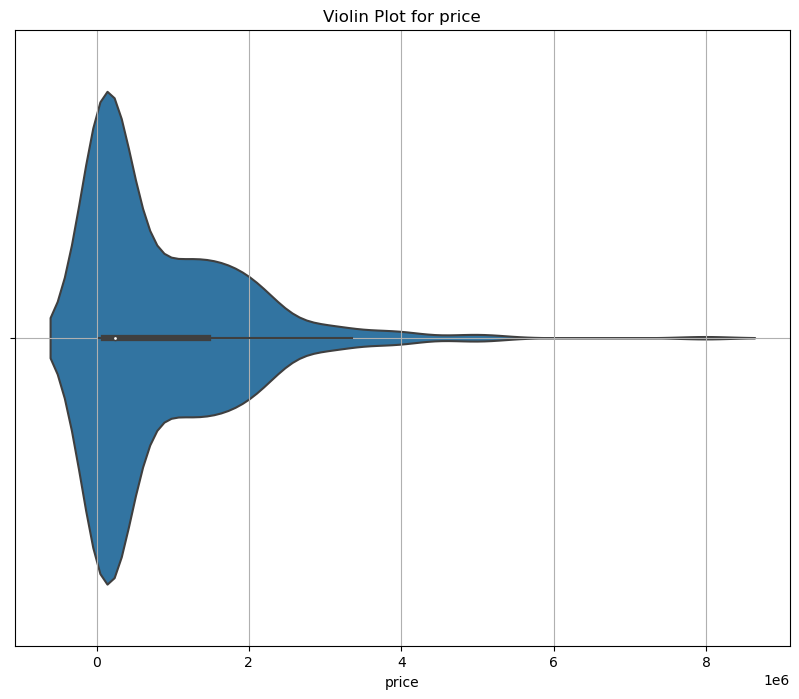

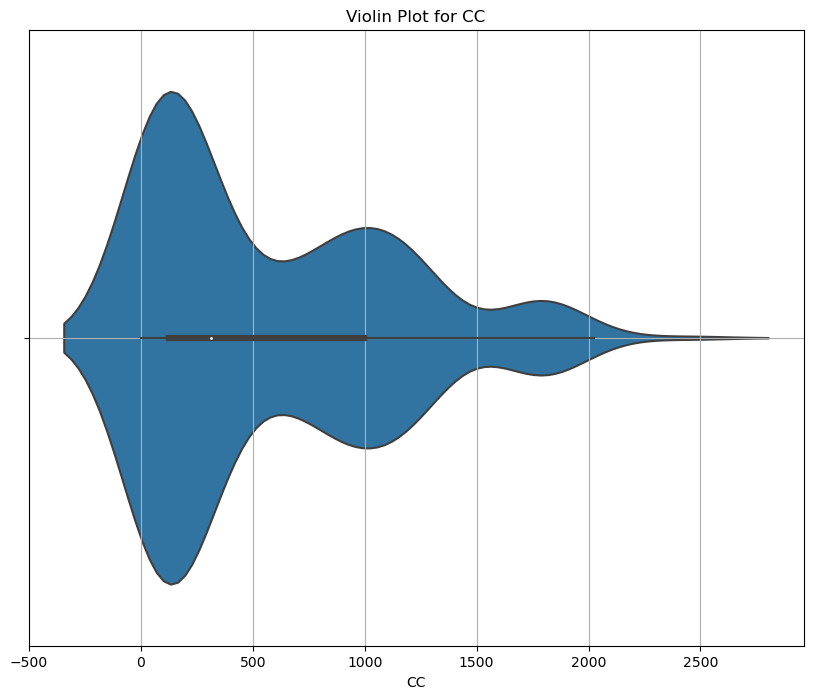

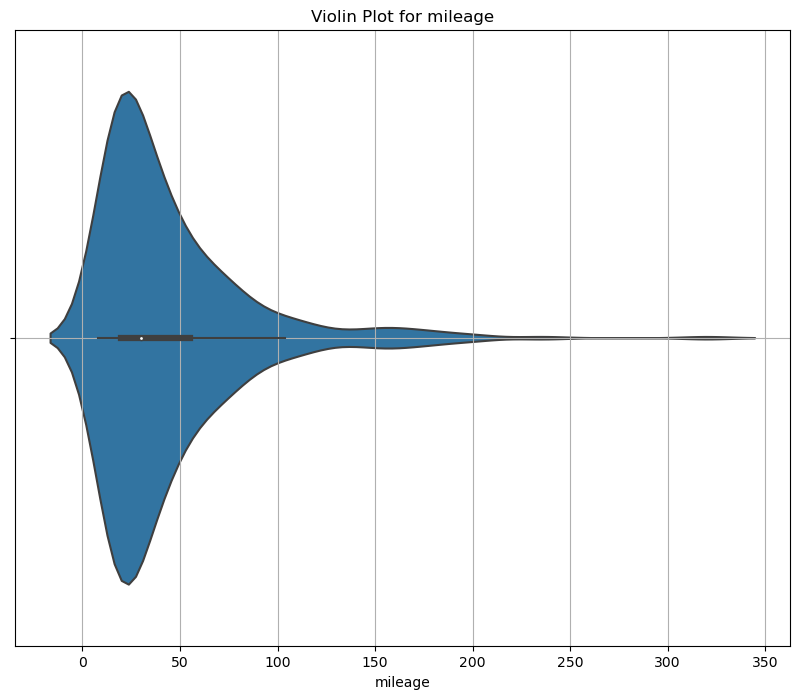

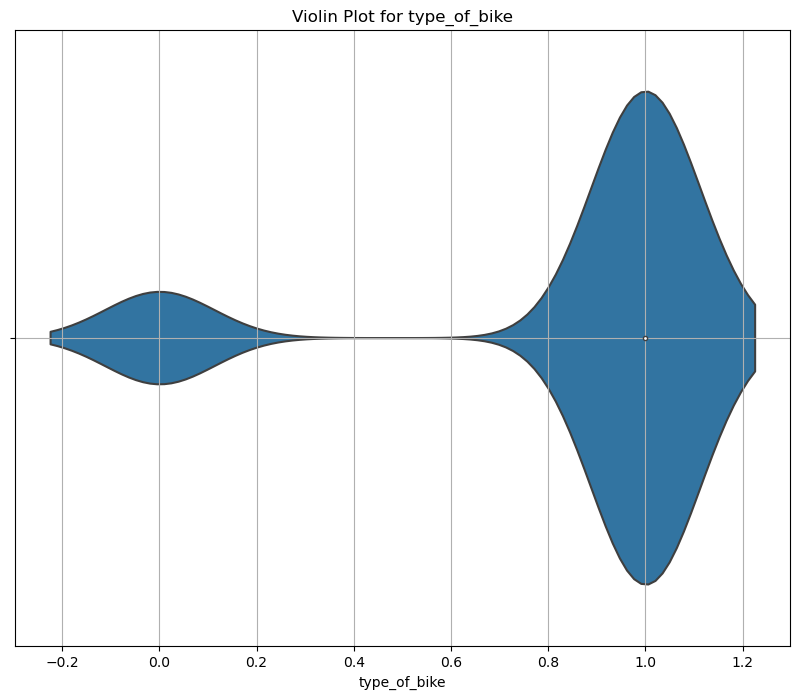

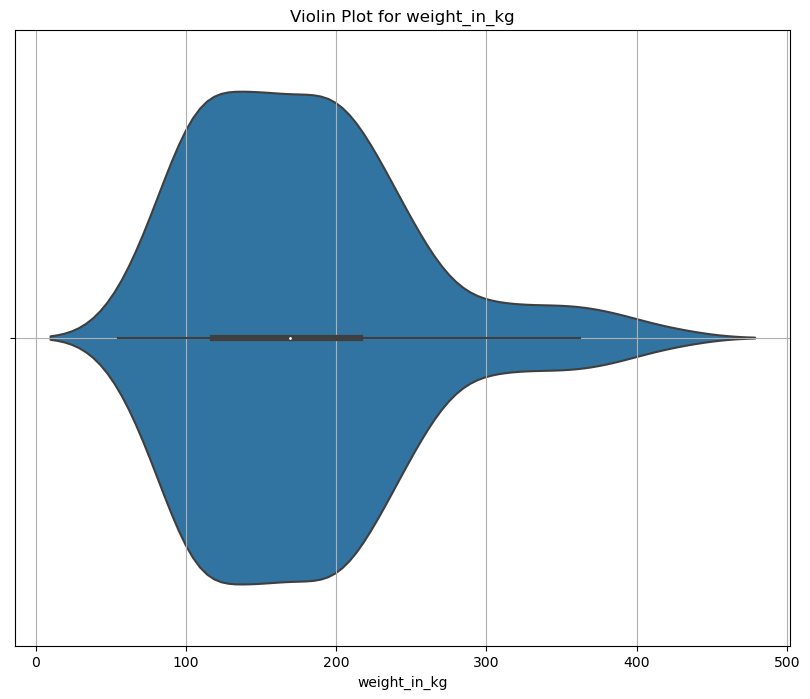

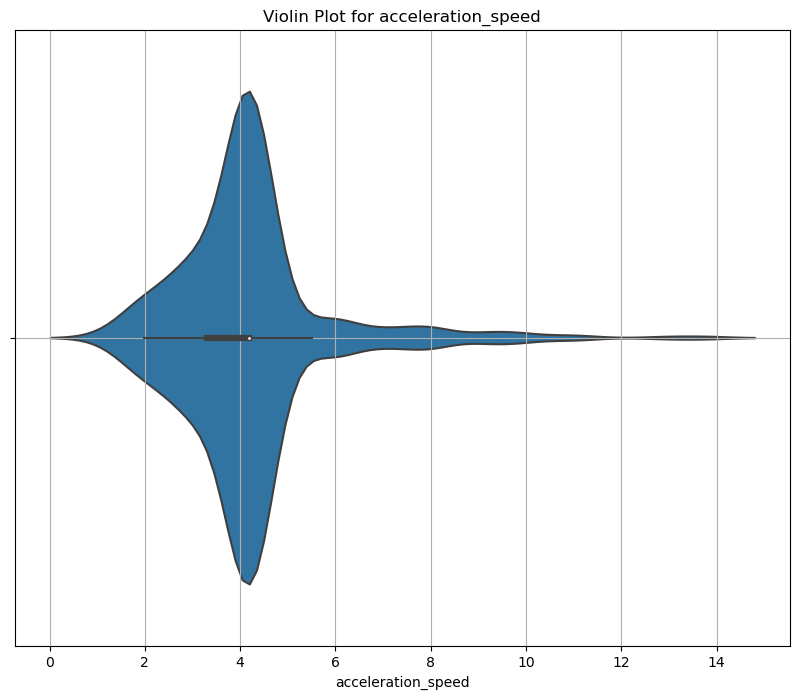

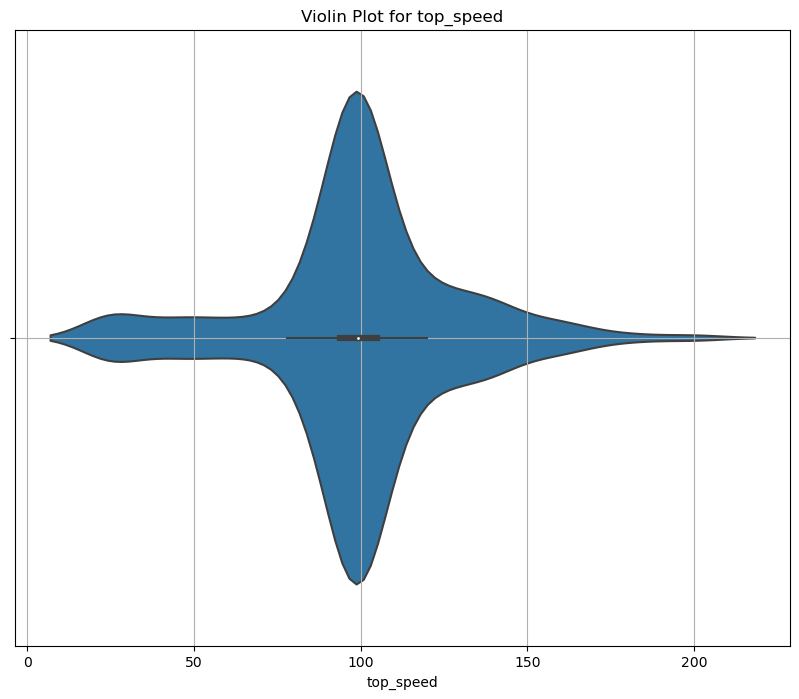

In [123]:
for column in numerical_data_cols:
    plt.figure(figsize=[10,8])
    sns.violinplot(x=column, data=data_2)
    plt.grid()
    plt.title("Violin Plot for {}".format(column))
    plt.show()

In [124]:
data_2.corr()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
price,1.000000,0.829417,-0.481968,0.312904,0.771784,-0.032915,0.048022
CC,0.829417,1.000000,-0.603819,0.443499,0.922758,-0.087573,0.145385
mileage,-0.481968,-0.603819,1.000000,-0.727187,-0.582938,0.200557,-0.383492
type_of_bike,0.312904,0.443499,-0.727187,1.000000,0.470598,-0.295883,0.650152
weight_in_kg,0.771784,0.922758,-0.582938,0.470598,1.000000,-0.197825,0.295124
acceleration_speed,-0.032915,-0.087573,0.200557,-0.295883,-0.197825,1.000000,-0.551446
top_speed,0.048022,0.145385,-0.383492,0.650152,0.295124,-0.551446,1.000000


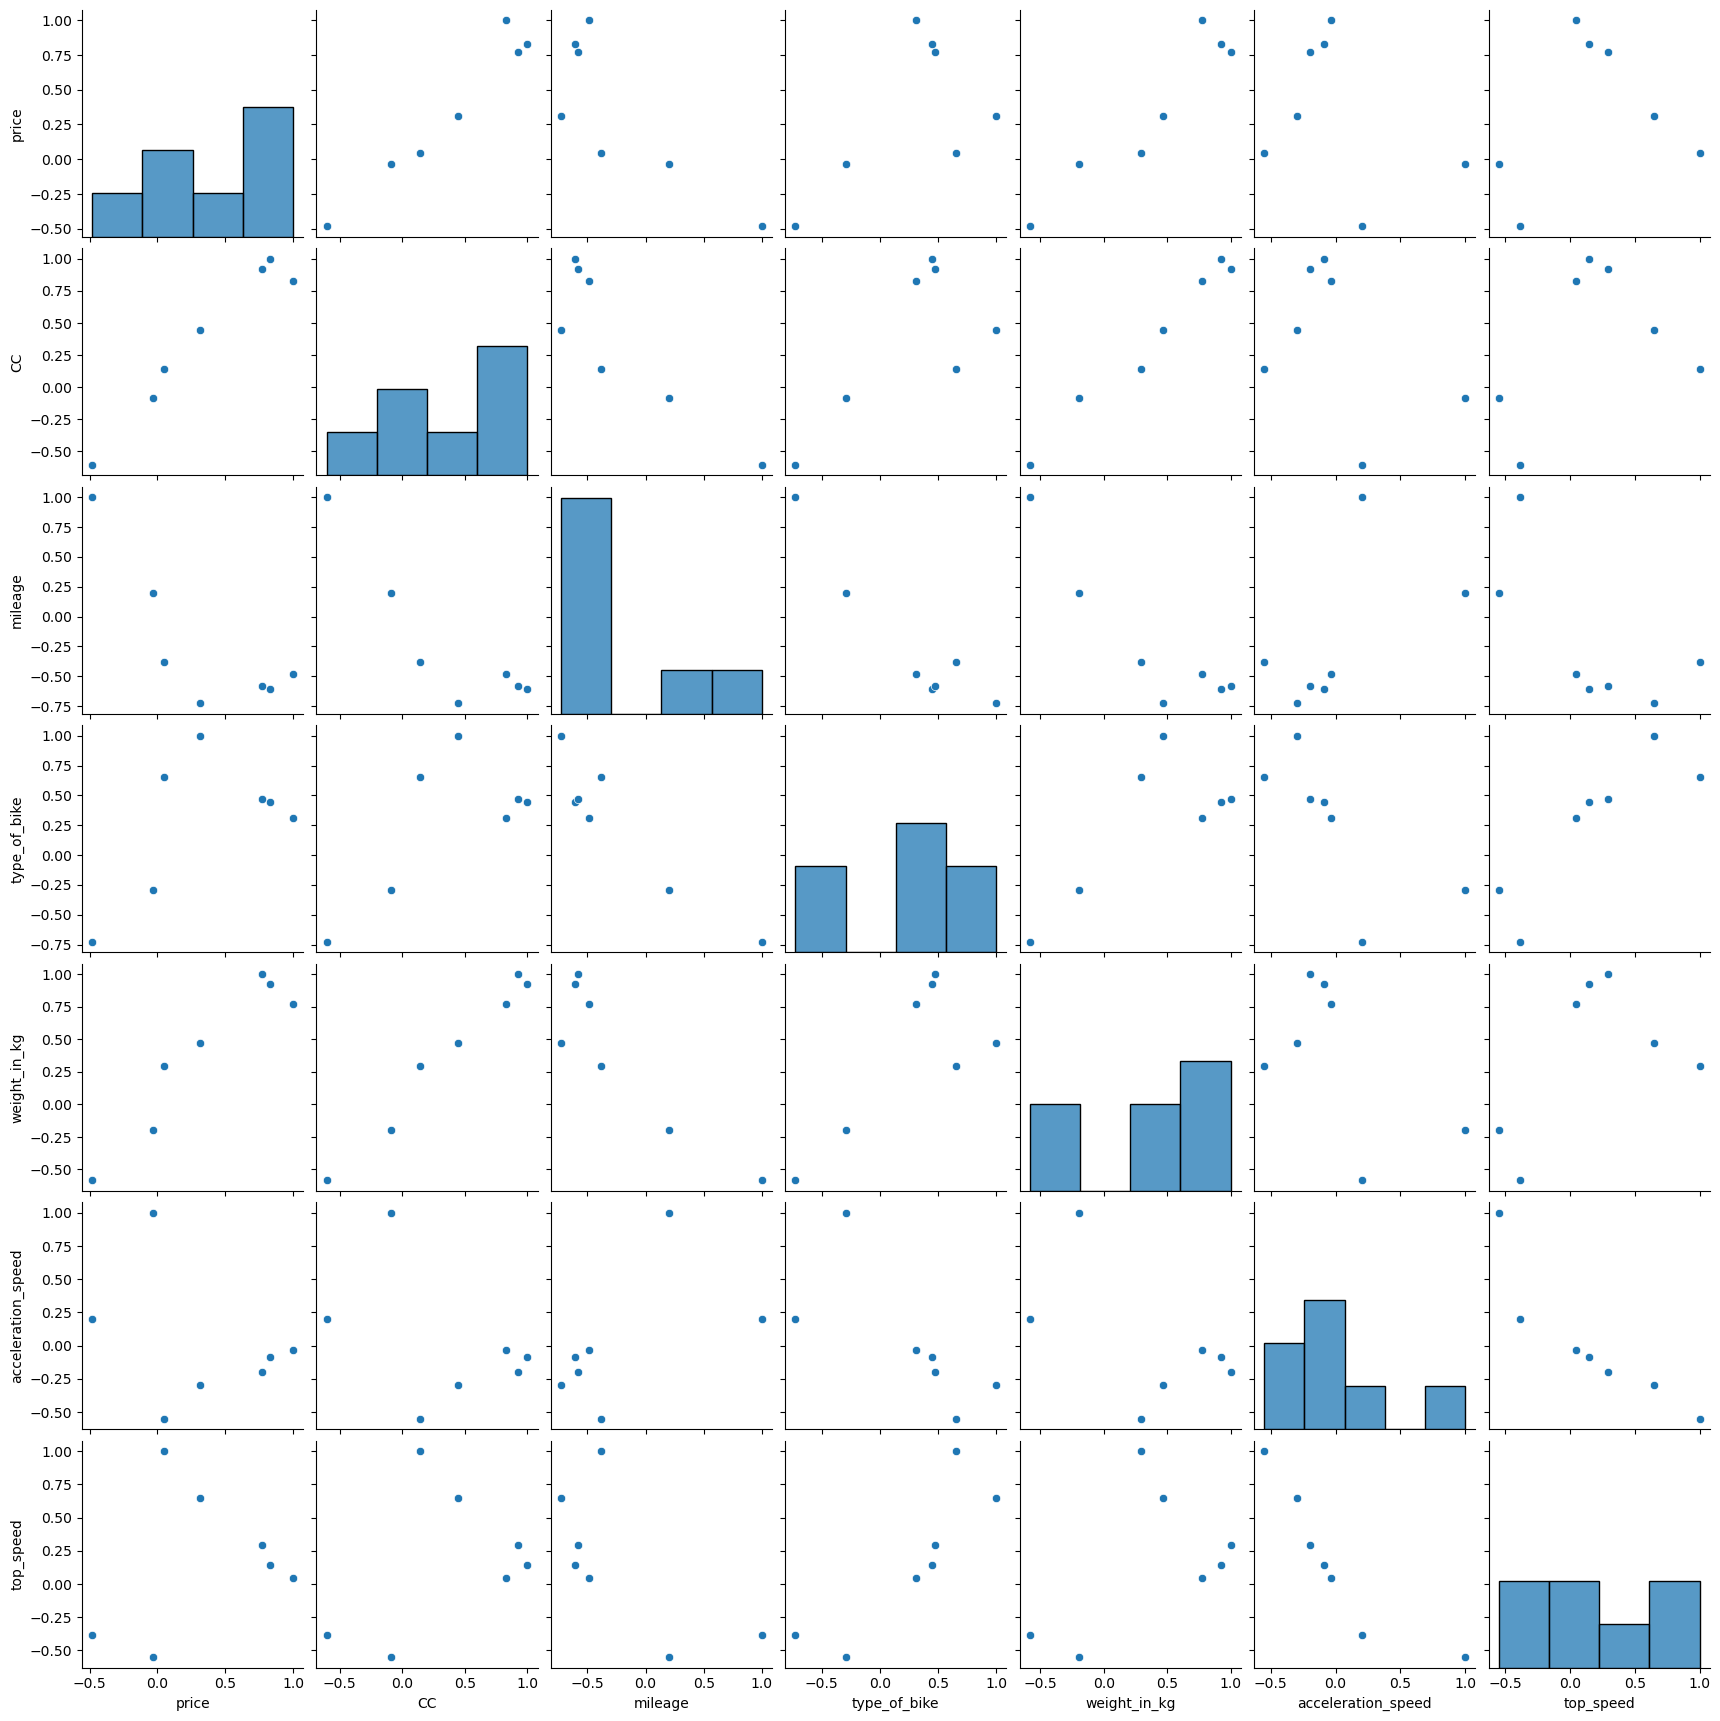

In [129]:
sns.pairplot(data_2.corr())
plt.show()

<AxesSubplot:>

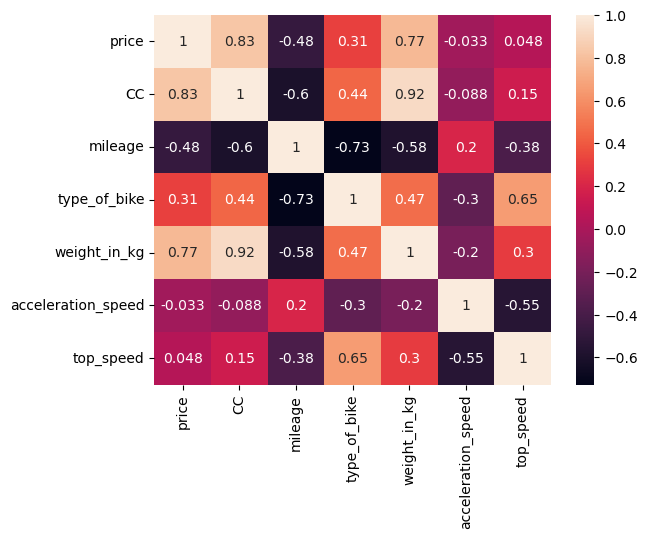

In [130]:
sns.heatmap(data_2.corr(), annot=True)

**Observation**

* We can observe that as the price increases the engine displacement increases and mileage decreases.
* We can see that more heavy the bike less is the mileage.
* The more the engine displacement the more is the top speed.
* The more high end premium class of bikes have more engine displacement and top speed.